# Showing Chi-Squared Distribution

In [1]:
#Load your packages
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import random


%matplotlib inline

In [3]:
#https://docs.scipy.org/doc/scipy/reference/stats.html

# But What is it?

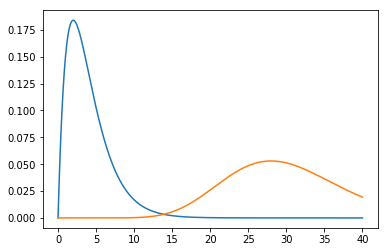

In [4]:
x= np.arange(0,40,0.001)
plt.plot(x, stats.chi2.pdf(x,4))
plt.plot(x, stats.chi2.pdf(x,30))

plt.show()

It really differs as you change the degrees of freedom!  I am going to use code from an earlier example to get normal data and select a sample from that!

In [5]:
#Let's try it!

r = stats.randint.rvs(1,7,size=1)

In [6]:
r #I just rolled the die!

array([4])

In [7]:
#Lets roll the die ten times and get the sum!
sum(stats.randint.rvs(1,7,size=10))

45

In [8]:
#Okay now I am going to get that random sum a whole bunch of times!
n = 1000 #number of 10 dice rolls
dist = [] #initialize the new set

for i in range(0,n): #do below n times
    dist.append(sum(stats.randint.rvs(1,7,size=10))) #take the list 'dist' and add another rando to it

In [9]:
dist

[31,
 40,
 34,
 30,
 33,
 32,
 35,
 38,
 47,
 36,
 31,
 45,
 32,
 44,
 31,
 32,
 48,
 40,
 27,
 43,
 32,
 34,
 37,
 34,
 41,
 35,
 38,
 34,
 37,
 39,
 31,
 39,
 30,
 28,
 35,
 33,
 31,
 35,
 43,
 24,
 41,
 33,
 38,
 25,
 40,
 32,
 42,
 35,
 36,
 35,
 28,
 38,
 23,
 39,
 35,
 45,
 41,
 33,
 35,
 37,
 46,
 35,
 36,
 36,
 34,
 33,
 34,
 44,
 35,
 33,
 36,
 37,
 35,
 31,
 28,
 47,
 31,
 45,
 36,
 32,
 35,
 50,
 37,
 35,
 37,
 39,
 39,
 25,
 37,
 27,
 30,
 42,
 34,
 49,
 26,
 25,
 33,
 25,
 30,
 35,
 38,
 41,
 41,
 40,
 32,
 37,
 30,
 38,
 34,
 35,
 34,
 27,
 26,
 37,
 37,
 37,
 34,
 34,
 41,
 31,
 38,
 45,
 34,
 34,
 40,
 41,
 38,
 34,
 35,
 40,
 30,
 49,
 36,
 36,
 36,
 37,
 42,
 39,
 44,
 37,
 28,
 33,
 26,
 44,
 48,
 39,
 30,
 39,
 43,
 47,
 30,
 31,
 28,
 40,
 30,
 44,
 36,
 36,
 40,
 38,
 37,
 29,
 39,
 34,
 39,
 41,
 35,
 26,
 30,
 43,
 32,
 30,
 34,
 25,
 33,
 35,
 28,
 35,
 32,
 37,
 31,
 23,
 42,
 34,
 41,
 29,
 37,
 41,
 39,
 32,
 30,
 37,
 25,
 38,
 40,
 44,
 24,
 42,
 36,
 38,


In [10]:
#So now what should the distribution of these sums look like?

##NORMAL## with
mu =10*3.5
sd = np.sqrt(10*17.5/6)


Text(0.5,1,'Normal and Random Sum of Ten Dice')

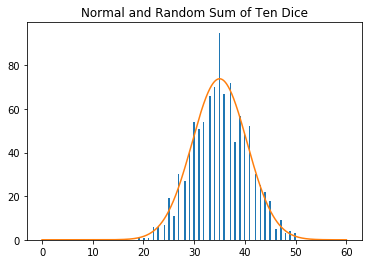

In [11]:
x= np.arange(0,60,0.001) #x values for the continuous function
plt.hist(dist,bins = 100) #histgram plot
plt.plot(x, n*stats.norm.pdf(x,mu,sd)) #make sure to center normal over mean and use correct standard deviation
plt.title('Normal and Random Sum of Ten Dice')

This is not really what the central limit theorem says though!  I need to take an average!

This will require just a few changes to the code above.

In [12]:
#Okay now I am going to get that random sum a whole bunch of times!
d = 10 #number of dice rolls
n = 1000 #number of times repeating experiment
dist = [] #initialize the new set

for i in range(0,n): #do below n times
    dist.append(sum(stats.randint.rvs(1,7,size=d))/d) #take the list 'dist' and add another rando to it

In [13]:
#So now what should the distribution of these sums look like?

##NORMAL## with
mu =3.5 #average of just one die roll
sd = np.sqrt(17.5/(6*d)) #standard deviation of one die divided by sqrt(d)

Text(0.5,1,'Normal and Random mean of 10 Dice')

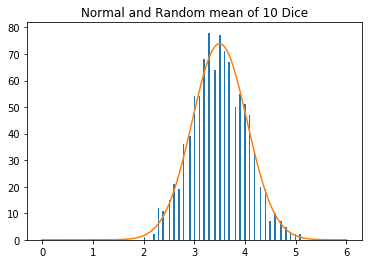

In [14]:
x= np.arange(0,6,0.001) #x values for the continuous function
plt.hist(dist,bins = 100) #histgram plot
plt.plot(x, n/d*stats.norm.pdf(x,mu,sd)) #make sure to center normal over mean and use correct standard deviation
plt.title('Normal and Random mean of {0} Dice'.format(d))

# Here is the new part!

So dist is normal.  Lets take a sample of it

In [15]:
sample = []

for x in range(0,10): #
    p = stats.randint.rvs(0,len(dist))#gives random number based on length of numbers
    sample.append(dist[p]) #picks the random entry and adds it to the sample

In [16]:
sample

[3.2000000000000002,
 3.8999999999999999,
 4.2000000000000002,
 3.7000000000000002,
 3.1000000000000001,
 3.2999999999999998,
 4.0,
 3.2999999999999998,
 3.3999999999999999,
 3.2000000000000002]

So this gave me one sample with 10 entries.  I know need to get a standard deviation.

In [17]:
np.std(sample, ddof=1)

0.38887301554906356

Great now lets do that a whole bunch of times!

In [18]:
distvar =[]
for y in range (0,1000):
    sample = []
    for x in range (0,10):
        p = stats.randint.rvs(0,len(dist))#gives random number based on length of numbers
        sample.append(dist[p]) #picks the random entry and adds it to the sample
    distvar.append(9*np.std(sample,ddof = 1)**2/sd**2)

In [19]:
distvar 


[12.905142857142861,
 5.3657142857142839,
 13.110857142857135,
 6.4320000000000004,
 4.5291428571428565,
 9.671999999999997,
 7.4914285714285711,
 7.6114285714285659,
 11.139428571428565,
 9.1371428571428481,
 7.2994285714285692,
 5.2422857142857131,
 8.4651428571428511,
 10.299428571428567,
 11.317714285714283,
 5.6262857142857126,
 7.4228571428571408,
 9.6308571428571383,
 15.596571428571428,
 10.985142857142854,
 12.37371428571428,
 9.137142857142857,
 9.7679999999999989,
 4.0079999999999982,
 9.791999999999998,
 7.1314285714285681,
 2.399999999999999,
 9.7508571428571447,
 8.1222857142857112,
 6.8434285714285696,
 6.0377142857142854,
 7.0079999999999982,
 5.2251428571428571,
 7.3508571428571399,
 18.92914285714285,
 10.590857142857136,
 9.9462857142857128,
 7.2857142857142838,
 10.837714285714281,
 13.86514285714285,
 8.173714285714281,
 6.5279999999999996,
 11.208,
 9.6857142857142851,
 10.162285714285714,
 9.2571428571428527,
 8.0537142857142836,
 10.710857142857144,
 12.75771428

In [26]:
distvar2 =[]
for y in range (0,1000):
    distvar2.append(9*np.std(random.sample(dist,10),ddof = 1)**2/sd**2)




Text(0.5,1,'Python mathplotlib')

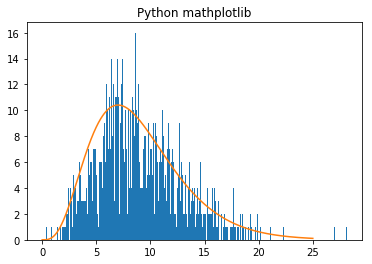

In [28]:
x= np.arange(0,25,0.0001) #x values for the continuous function
plt.hist(distvar2,bins=350) #histgram plot
plt.plot(x, 100*stats.chi2.pdf(x,9)) #make sure to center normal over mean and use correct standard deviation
plt.title('Python mathplotlib')

In [21]:
import csv


csvfile = "printout.csv"

#Assuming res is a flat list
with open(csvfile, "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    for val in distvar:
        writer.writerow([val])    

#Assuming res is a list of lists
#with open(csvfile, "w") as output:
#    writer = csv.writer(output, lineterminator='\n')
#    writer.writerows(distvar)